# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [5]:
df.isnull().head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().sum() # no missing data 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


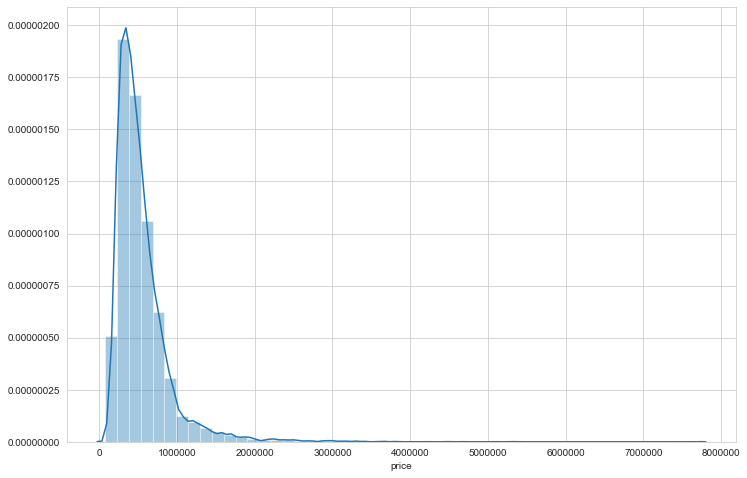

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'], vertical= False)

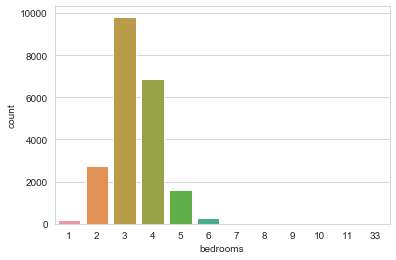

In [15]:
sns.countplot(df['bedrooms'])

In [16]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [18]:
df.corr()['price'].sort_values() # extract the corr with col price 

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

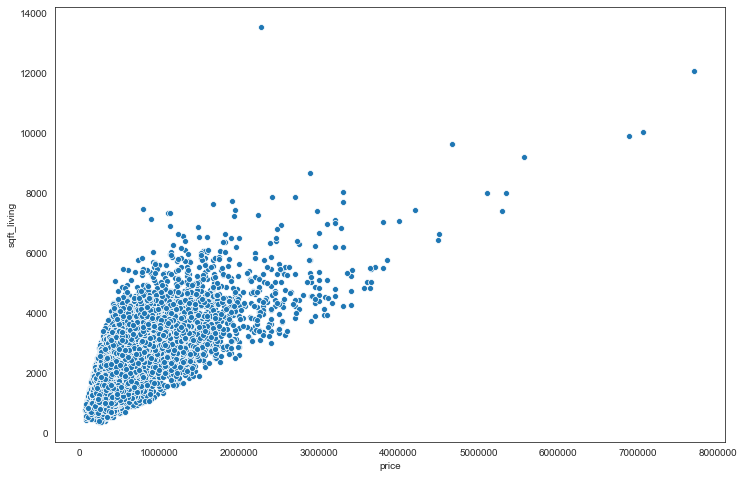

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df) # exploring the highly correlated features 

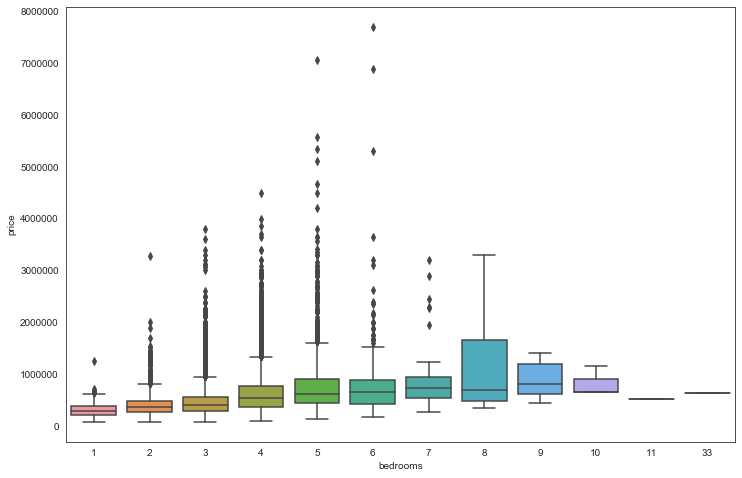

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

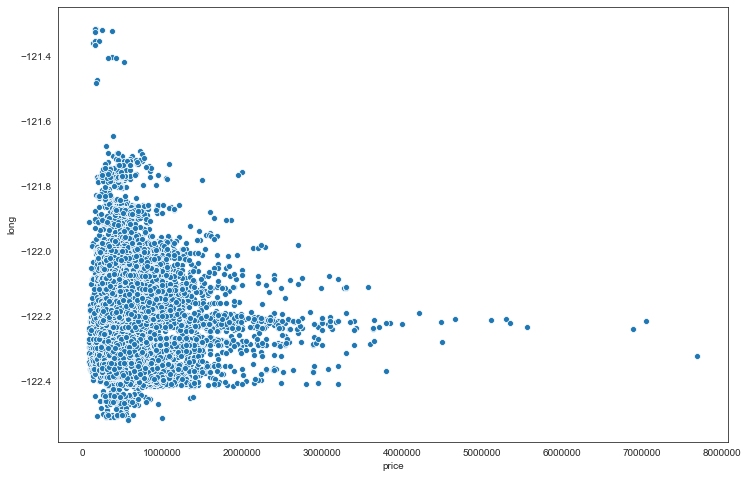

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

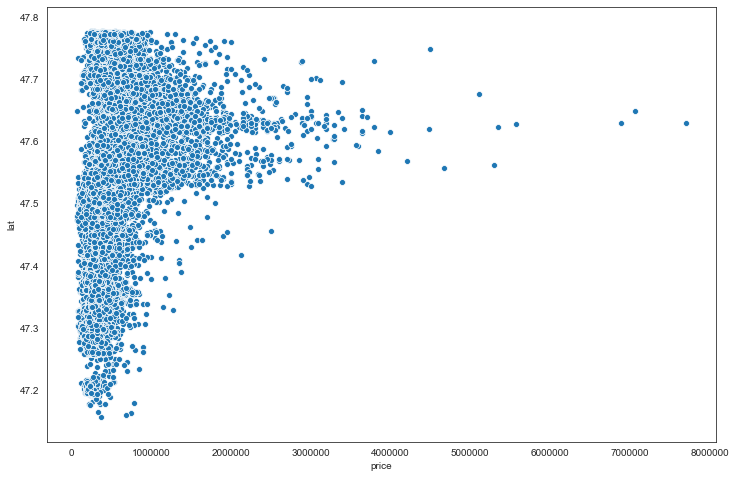

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df) # 47.6 t o47.7 tend to be expensive arear

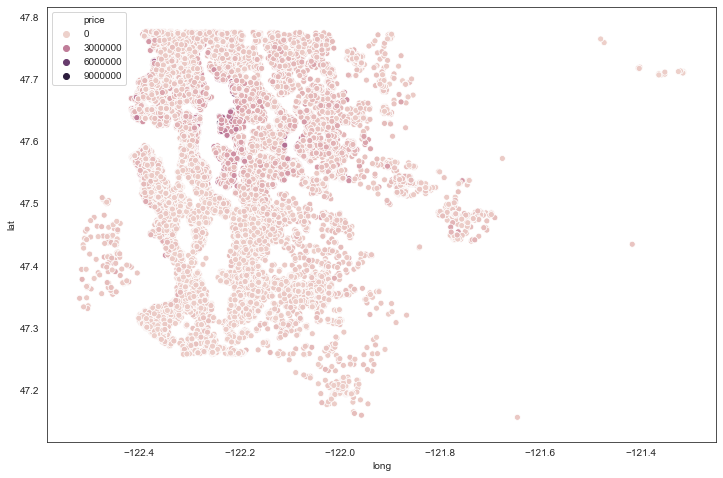

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price') # color the expensive hourse darker 

In [30]:
df.sort_values('price',ascending=False).head(20) # top 20 most expensive hourses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [32]:
len(df)*(0.01) # 1%

215.97

In [33]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] # after 1% expensive hourse 

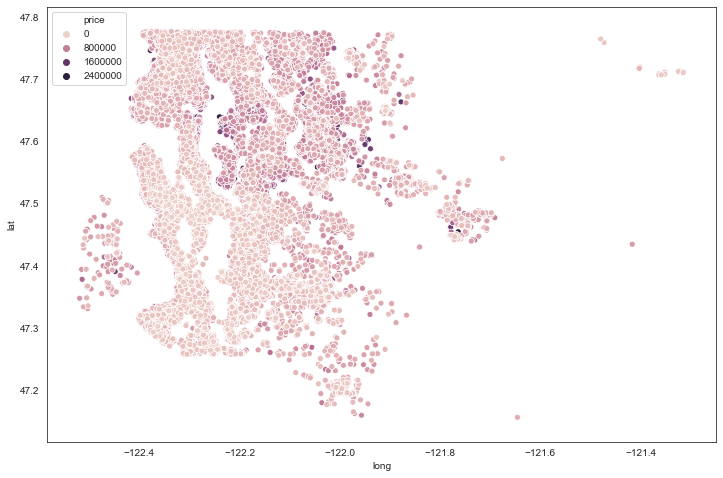

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                )

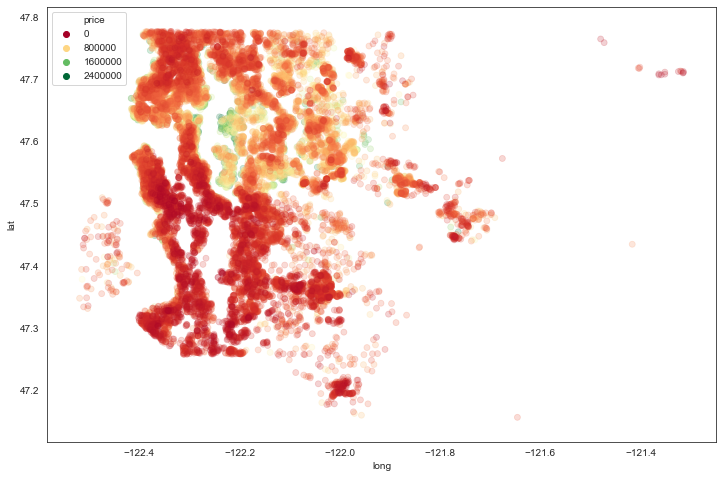

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

In [43]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


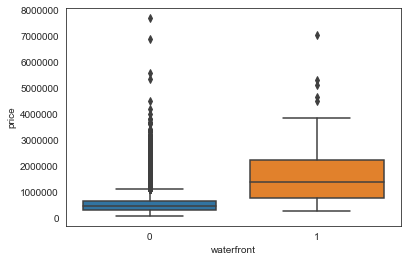

In [42]:
sns.boxplot(x='waterfront',y='price',data=df) # the hourse near water 

## Working with Feature Data

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [44]:
df = df.drop('id',axis=1) # drop id col 

In [45]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [46]:
df['date'].head(3)

0    10/13/2014
1     12/9/2014
2     2/25/2015
Name: date, dtype: object

In [47]:
df['date'] = pd.to_datetime(df['date']) # transform to datatime format 

In [48]:
df['date'].head(3)

0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

In [49]:
df['month'] = df['date'].apply(lambda date:date.month) # extracts month

In [50]:
df['year'] = df['date'].apply(lambda date:date.year)

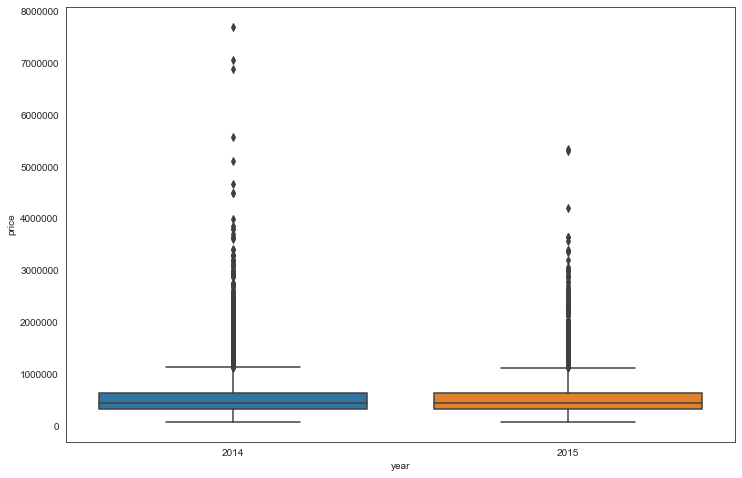

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='year',y='price',data=df)

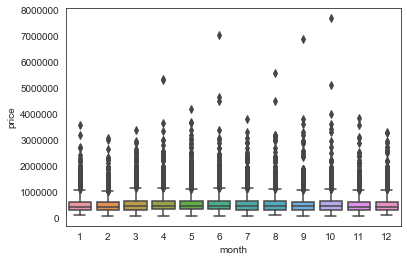

In [52]:
sns.boxplot(x='month',y='price',data=df)

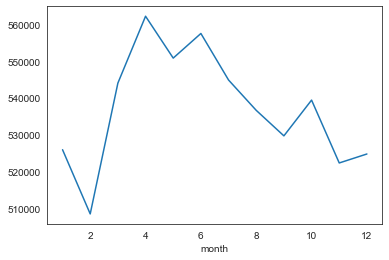

In [54]:
df.groupby('month').mean()['price'].plot()

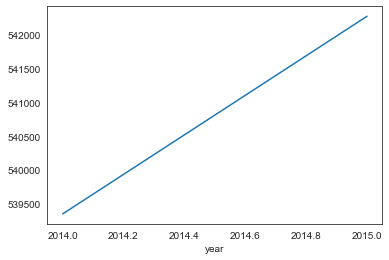

In [55]:
df.groupby('year').mean()['price'].plot()

In [56]:
df = df.drop('date',axis=1)

In [58]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [59]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [60]:
df = df.drop('zipcode',axis=1)

In [61]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [63]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [66]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts() # 0 haven't not renovated 

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [68]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014


In [69]:
X = df.drop('price',axis=1)
y = df['price']

In [70]:
y.head(1)

0    221900.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train= scaler.fit_transform(X_train)

In [78]:
X_test = scaler.transform(X_test)# don't fit to test set 

In [79]:
X_train.shape

(15117, 19)

In [80]:
X_test.shape

(6480, 19)

## Creating a Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [82]:
model = Sequential()

model.add(Dense(19,activation='relu')) # check the features 19, it make sense to have 19 neuron in one layer 
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))# last final layer 

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [87]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)
# check the test data validation_data, will not affect the model
# fit in batchs the samll the long to traning the model 

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430221000704.0000 - val_loss: 418818457600.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428285329408.0000 - val_loss: 412580642816.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 406108372992.0000 - val_loss: 364645416960.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 312185126912.0000 - val_loss: 223711690752.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 159729778688.0000 - val_loss: 105558122496.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 101384896512.0000 - val_loss: 95288614912.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 97645207552.0000 - val_loss: 93745586176.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 95972311040.0000 - val_loss: 92140036096.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32955185152.0000 - val_loss: 31429226496.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32914012160.0000 - val_loss: 31416653824.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32856035328.0000 - val_loss: 31587598336.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32873844736.0000 - val_loss: 31313788928.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32877244416.0000 - val_loss: 31277383680.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32788443136.0000 - val_loss: 31331756032.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32778928128.0000 - val_loss: 31326347264.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32751192064.0000 - val_loss: 31180320768.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 30540152832.0000 - val_loss: 28579170304.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30593468416.0000 - val_loss: 28581642240.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30534660096.0000 - val_loss: 28566224896.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30547460096.0000 - val_loss: 28589725696.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30560481280.0000 - val_loss: 28573816832.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30567510016.0000 - val_loss: 28552501248.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30499201024.0000 - val_loss: 28535816192.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 30485250048.0000 - val_loss: 28564867072.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29471717376.0000 - val_loss: 27211036672.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29420513280.0000 - val_loss: 27206027264.0000


In [88]:
model.history.history

{'loss': [430221000704.0,
  428285329408.0,
  406108372992.0,
  312185126912.0,
  159729778688.0,
  101384896512.0,
  97645207552.0,
  95972311040.0,
  94279966720.0,
  92550553600.0,
  90761912320.0,
  88922988544.0,
  87021748224.0,
  85032714240.0,
  82998853632.0,
  80944873472.0,
  78847377408.0,
  76539494400.0,
  74229833728.0,
  71856807936.0,
  69433499648.0,
  66986602496.0,
  64548253696.0,
  62240546816.0,
  59957424128.0,
  57935433728.0,
  56132464640.0,
  54612971520.0,
  53293133824.0,
  52245557248.0,
  51378696192.0,
  50599333888.0,
  49949696000.0,
  49379987456.0,
  48833712128.0,
  48272130048.0,
  47832379392.0,
  47383162880.0,
  46958956544.0,
  46553464832.0,
  46143553536.0,
  45730541568.0,
  45286572032.0,
  44896780288.0,
  44539363328.0,
  44179685376.0,
  43702050816.0,
  43357290496.0,
  42988929024.0,
  42584412160.0,
  42231902208.0,
  41854148608.0,
  41556795392.0,
  41242365952.0,
  40961798144.0,
  40686612480.0,
  40409841664.0,
  40132030464.0,


In [47]:
losses = pd.DataFrame(model.history.history)

In [89]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302210e+11,4.188185e+11
1,4.282853e+11,4.125806e+11
2,4.061084e+11,3.646454e+11
3,3.121851e+11,2.237117e+11
4,1.597298e+11,1.055581e+11
...,...,...
395,2.947069e+10,2.727815e+10
396,2.946099e+10,2.723238e+10
397,2.947071e+10,2.727022e+10
398,2.947172e+10,2.721104e+10


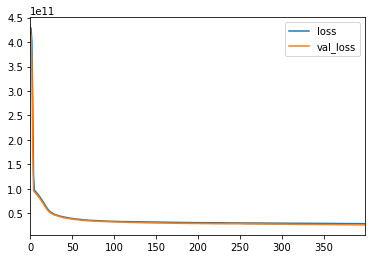

In [48]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [93]:
len(X_test)

6480

In [91]:
predictions = model.predict(X_test)

In [92]:
mean_absolute_error(y_test,predictions)

101903.99232976466

In [95]:
mean_squared_error(y_test,predictions)

27206022936.917553

In [94]:
np.sqrt(mean_squared_error(y_test,predictions))

164942.48372362275

In [98]:
explained_variance_score(y_test,predictions)

0.7950506077155056

In [97]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [55]:
df['price'].mean()

540296.5735055795

In [56]:
df['price'].median()

450000.0

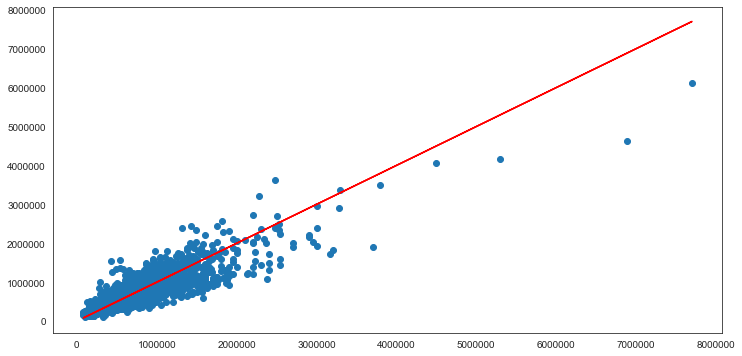

In [99]:
plt.figure(figsize = (12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

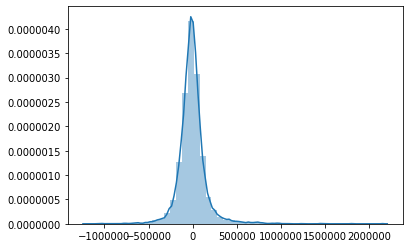

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [100]:
single_house = df.drop('price',axis=1).iloc[0] # first row as new hourse to predict 

In [101]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [102]:
# scaler the data 
single_house.values.reshape(-1, 19)
# -1 means keep those old dimensions 

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [103]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [104]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [105]:
model.predict(single_house)

array([[289854.56]], dtype=float32)

In [106]:
df.iloc[0] 

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [ ]:
# 289854 with 221900  big different 
this looks like we are kind of overshooting here, there may be exist an issue when we try to fit the 
extreme values(large values ), so next step, you can actually retrain the model by dropping out the
top 1 or 2 percent values and see whether it can reduce the MSE 

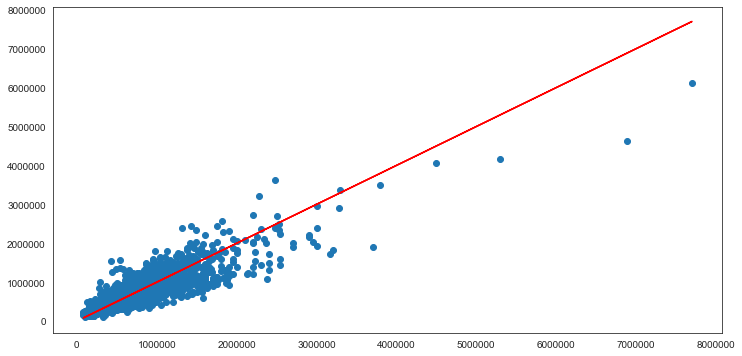

In [107]:
plt.figure(figsize = (12,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [108]:
# save the model 
from tensorflow.keras.models import load_model
model.save('hourse_prediction_model.h5')  

In [109]:
later_model = load_model('hourse_prediction_model.h5')
later_model.predict(single_house)

array([[289854.56]], dtype=float32)